# KNN Model for MNIST

In [6]:
import pandas as pd
import numpy as np
from sklearn import neighbors, model_selection, metrics
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Get Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


## Transform Data in 2D

In [4]:
nsamples, nx, ny = x_train.shape
d2_x_train = x_train.reshape((nsamples,nx*ny))

## Train KNN Model

In [5]:
knn = neighbors.KNeighborsClassifier()
knn.fit(d2_x_train, y_train)
train_pred = model_selection.cross_val_predict(knn, d2_x_train, y_train, cv=5, n_jobs=-1)
train_results = model_selection.cross_val_score(knn, d2_x_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
print("Accuracy:", train_results) 

Accuracy: [0.9697626  0.97017164 0.96941667 0.96815871 0.96898966]


## Measure Performance

In [8]:
train_balanced_acc = metrics.balanced_accuracy_score(y_train, train_pred)
print("Balanced Accuracy:", train_balanced_acc)

Balanced Accuracy: 0.9688191116705687


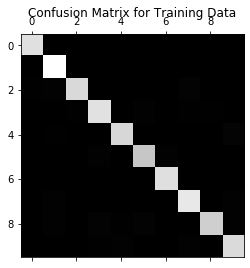

In [9]:
conf_mx_train = metrics.confusion_matrix(y_train, train_pred)
plt.matshow(conf_mx_train, cmap=plt.cm.gray)
plt.title("Confusion Matrix for Training Data")
plt.show()

## Search for Optimal Hyperparameters

In [ ]:
params = {
  'n_neighbors': [i for i in range(1,60,2)],
  'weights': ['uniform', 'distance']
}
gsearch = model_selection.GridSearchCV(knn, params, cv=5, scoring='balanced_accuracy')
gsearch.fit(d2_x_train, y_train)
gsearch.best_params_, gsearch.best_score_